In [27]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder # label encoder for binary class in single column
from sklearn.compose import ColumnTransformer # catecorigal encode for >2 class in single column
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
#calling Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix
# calling plot
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
url='https://raw.githubusercontent.com/redashu/Datasets/refs/heads/master/data_preprocess1.csv'

In [3]:
df=pd.read_csv(url)

In [4]:
#print(df)

In [5]:
#df.info()

In [6]:
#df.head()

In [7]:
#df.tail()

In [8]:
#df['Age']

In [9]:
#df[['Age','Salary']]

In [10]:
#df.iloc[:,2]

In [11]:
# selecting required features and labels
input_features=df.iloc[:,0:3].values
label = df.iloc[:,-1].values

In [12]:
label

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
      dtype=object)

In [13]:
input_features

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0],
       ['Germany', 28.0, 49000.0],
       ['France', 42.0, 75000.0],
       ['Spain', 33.0, 56000.0],
       ['Germany', 45.0, 77000.0],
       ['France', 29.0, 51000.0],
       ['Spain', 51.0, 85000.0],
       ['Germany', 36.0, nan],
       ['France', 31.0, 55000.0],
       ['Spain', 39.0, 63000.0],
       ['Germany', 47.0, 80000.0],
       ['France', 26.0, 47000.0],
       ['Spain', 32.0, 53000.0],
       ['Germany', 41.0, 71000.0],
       ['France', 49.0, 82000.0],
       ['Spain', 34.0, 57000.0],
       ['Germany', 43.0, 74000.0],
       ['France', 52.0, 88000.0],
       ['Spain', 46.0, 78000.0],
       ['Germany', 25.0, 45000.0],
       ['France', 53.0

In [14]:
#fixing age and salary missing value
rcm_impute = SimpleImputer(missing_values=np.nan,strategy='mean')

In [15]:
rcm_impute.fit(input_features[:,1:3]) # calculating missing values
input_features[:,1:3] = rcm_impute.transform(input_features[:,1:3]) # making changes


In [16]:
# conver 2 values to 0 and 1 (labels)
le=LabelEncoder()
label = le.fit_transform(label)
#print(label)


In [17]:
# data preprocessing using categorical values
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')

In [18]:
input_features=np.array(ct.fit_transform(input_features))
#print(input_features)

In [19]:
# finally have input (features) and output (labels) for ML algorithm
# note test_size (0 to 1) ---0.1 means 10% testing data size
training_input, testing_input, train_label, test_label = train_test_split(input_features,label,test_size=0.1)


In [20]:
# calling decision tree classifier
dec_class = DecisionTreeClassifier()

In [21]:
# Training classifier with above preprocessed split data
trained_model = dec_class.fit(training_input,train_label)

In [22]:
# test the model
predicted_values = trained_model.predict(testing_input)

In [23]:
print(predicted_values)

[0 1 1]


In [24]:
print(test_label)

[0 1 0]


In [25]:
# using accuracy score (from 0 to 1) x 100 = Precent accuracy
accuracy_score(test_label,predicted_values)

0.6666666666666666

In [26]:
# test by input new random data ---you can try for homework
rcm_new_data = np.array([['Spain','39','510000']])

In [33]:
# show classifiers
#le.classes_
#ct.get_feature_names_out()

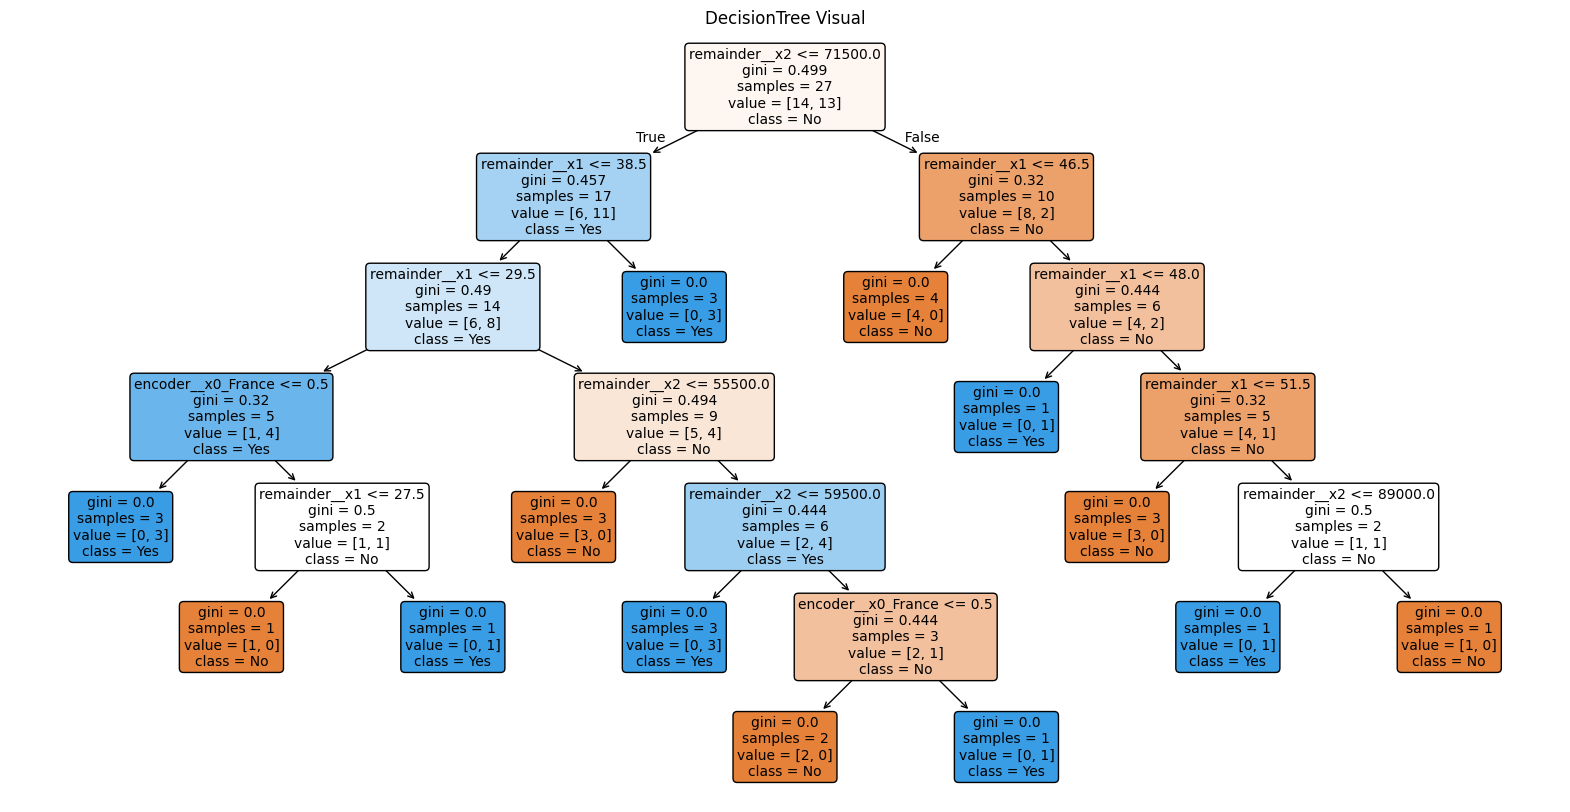

In [38]:
# use python to check decision tree graph
plt.figure(figsize=(20,10))
plot_tree(dec_class,
         feature_names=ct.get_feature_names_out(),
         class_names=le.classes_,
         filled=True,
         fontsize=10,
         rounded=True)
plt.title("DecisionTree Visual")        
plt.show()